# Chapter.1 Artificial Intelligence

## 教師なし学習

### インポート

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

`pylab`について：https://queirozf.com/entries/matplotlib-pylab-pyplot-etc-what-s-the-different-between-these
`pyplot`と同じ`matplotlib`のモジュールであるが、現在は使用非推奨となっている。

### 描画設定

In [2]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4,
                    suppress=True)

### クラスタリング用データセットの作成

In [3]:
x, y = make_blobs(n_samples=100,
                  centers=4,
                  random_state=500,
                  cluster_std=1.25)

`sklearn.datasets.make_brobs`：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
クラスタリング用の等方性ガウス分布の塊（blob）を作成することができる。

### モデル定義

In [4]:
model = KMeans(n_clusters=4,
               random_state=0)

KMeans：https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### モデル学習

In [5]:
model.fit(x)

KMeans(n_clusters=4, random_state=0)

### 予測

In [6]:
y_ = model.predict(x)
y_

array([3, 3, 1, 2, 1, 1, 3, 2, 1, 2, 2, 3, 2, 0, 0, 3, 2, 0, 2, 0, 0, 3,
       1, 2, 1, 1, 0, 0, 1, 3, 2, 1, 1, 0, 1, 3, 1, 3, 2, 2, 2, 1, 0, 0,
       3, 1, 2, 0, 2, 0, 3, 0, 1, 0, 1, 3, 1, 2, 0, 3, 1, 0, 3, 2, 3, 0,
       1, 1, 1, 2, 3, 1, 2, 0, 2, 3, 2, 0, 2, 2, 1, 3, 1, 3, 2, 2, 3, 2,
       0, 0, 0, 3, 3, 3, 3, 0, 3, 1, 0, 0], dtype=int32)

### 描画

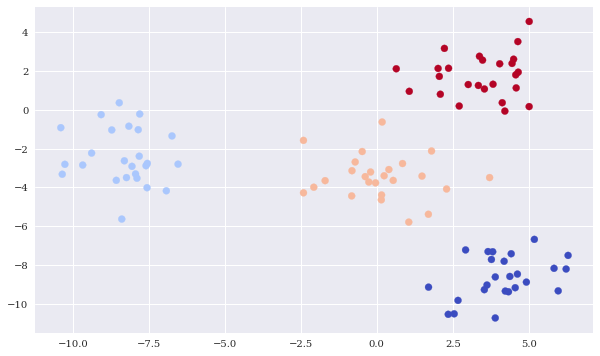

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0],
            x[:, 1],
            c=y_,
            cmap='coolwarm')

## 強化学習

### 状態空間の設定(1=表、0=裏)

In [8]:
ssp = [1, 1, 1, 1, 0]

### 行動空間の設定(1=表に賭ける、0=裏に賭ける)

In [9]:
asp = [1, 0]

### 賭け函数の定義

In [10]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

### 報酬計算

In [11]:
rl = np.array([epoch() for _ in range(15)])
rl

array([56, 47, 50, 52, 48, 44, 56, 52, 50, 48, 43, 51, 51, 50, 46])

### 報酬平均

In [12]:
rl.mean()

49.6

### 状態空間の設定(1=表、0=裏)

In [13]:
ssp = [1, 1, 1, 1, 0]

### 賭け函数の定義

上の`epoch`と異なるのは、函数内で行動空間を定義すること、そして1アクションごとに行動空間に表・裏の結果を追加していくこと。
これにより、強化学習を近似している。

In [14]:
def epoch():
    tr = 0
    asp = [0, 1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

### 報酬計算

In [15]:
rl = np.array([epoch() for _ in range(15)])
rl

array([59, 63, 73, 65, 61, 71, 68, 77, 69, 61, 71, 69, 71, 64, 61])

### 報酬平均

In [16]:
rl.mean()

66.86666666666666

## 教師あり学習

### 最小二乗回帰

### 教師函数定義

In [17]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

### `x`の定義

In [18]:
x = np.linspace(-2,
                4,
                25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

`np.linspace`：https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
使い方：https://note.nkmk.me/python-numpy-arange-linspace/

### `y=f(x)`の計算

In [19]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

### 描画

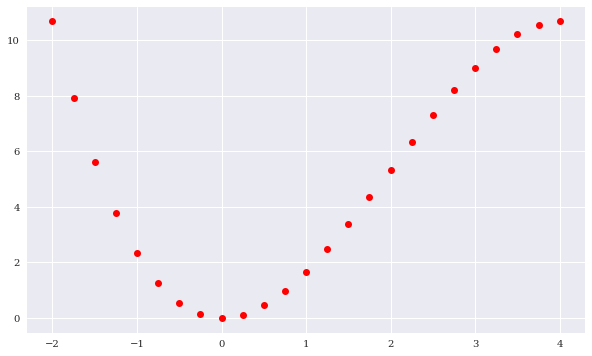

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x,
         y,
         'ro')

### `beta`の算出

In [21]:
beta = np.cov(x,
              y,
              ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

### `alpha`の算出

In [22]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

### 最小二乗法による予測

In [23]:
y_ = alpha + beta * x

### `MSE`算出

In [24]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

### 元データと予測の描画

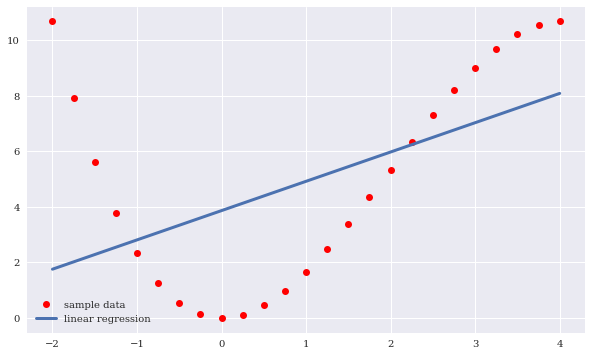

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x,
         y,
         'ro',
         label='sample data')
plt.plot(x,
         y_,
         lw=3.0,
         label='linear regression')
plt.legend();

### 多項式による予測と描画

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


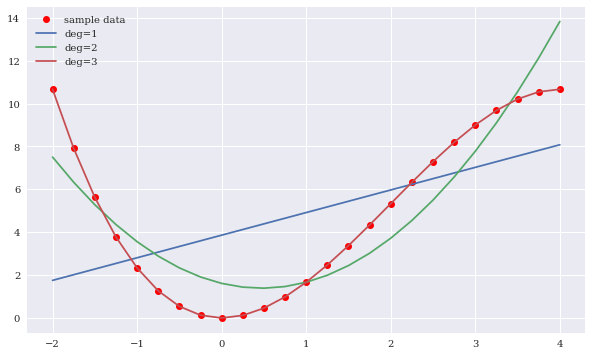

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(x,
         y,
         'ro',
         label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x,
                     y,
                     deg=deg)
    y_ = np.polyval(reg,
                    x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x,
             np.polyval(reg,
                        x),
             label=f'deg={deg}')
plt.legend();

`np.polyfit`：https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
`np.polyval`：https://numpy.org/doc/stable/reference/generated/numpy.polyval.html

### 係数表示

In [27]:
reg

array([-0.3333,  2.    ,  0.    , -0.    ])

## Neural Network - Scikit-learn使用

### インポート(追加)

In [28]:
from sklearn.neural_network import MLPRegressor

### モデル定義

In [29]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)

`MLPRegressor`：https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

### モデル学習

In [30]:
model.fit(x.reshape(-1,
                    1),
          y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

### 予測

In [31]:
y_ = model.predict(x.reshape(-1, 1))

### MSE算出

In [32]:
MSE = ((y - y_) ** 2).mean()
MSE

0.006624466318183129

### 描画

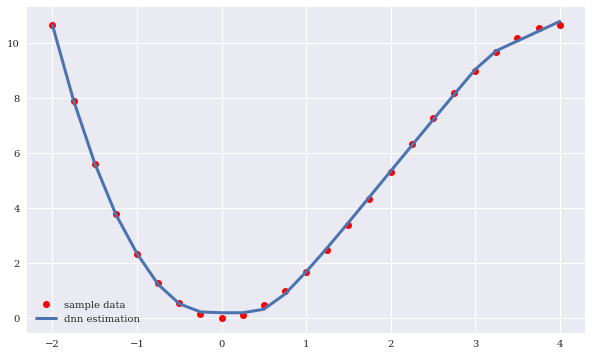

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(x,
         y,
         'ro',
         label='sample data')
plt.plot(x,
         y_,
         lw=3.0,
         label='dnn estimation')
plt.legend();

## Neural Network - Keras使用

### インポート(追加)

In [34]:
import os
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

### 設定

In [35]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.random.set_seed(100)

`os.environ`：https://note.nkmk.me/python-os-environ-getenv/
`TF_CPP_MIN_LOG_LEVEL`：https://cocoinit23.com/tensorflow-warning-ignore/

### モデル定義・コンパイル

(この、「コンパイル」って正しいのか？)

In [36]:
model = Sequential()
model.add(Dense(256,
                activation='relu',
                input_dim=1))
model.add(Dense(1,
                activation='linear'))
model.compile(loss='mse',
              optimizer='rmsprop')

### 以前のMSEを表示

In [37]:
((y - y_) ** 2).mean()

0.006624466318183129

### 予測と描画

round=1 | MSE=3.87256
round=2 | MSE=0.92527
round=3 | MSE=0.28527
round=4 | MSE=0.13191
round=5 | MSE=0.09568
round=6 | MSE=0.07977
round=7 | MSE=0.06739
round=8 | MSE=0.05688
round=9 | MSE=0.04768


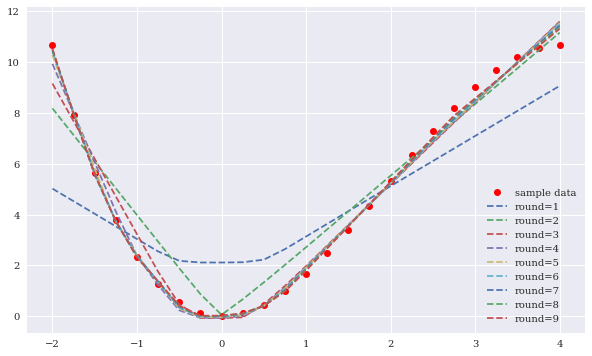

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(x,
         y,
         'ro',
         label='sample data')
for _ in range(1, 10):
    model.fit(x,
              y,
              epochs=100,
              verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x,
             y_,
             '--',
             label=f'round={_}')
plt.legend();

## ランダムデータを予測する

### 多項式予測

In [39]:
np.random.seed(0)
x = np.linspace(-1,
                1)
y = np.random.random(len(x)) * 2 - 1

### 予測と描画

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


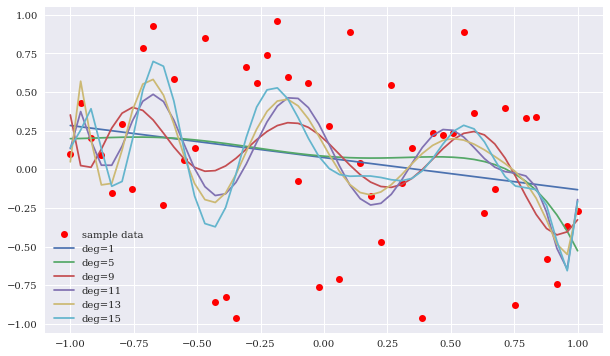

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(x,
         y,
         'ro',
         label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x,
                     y,
                     deg=deg)
    y_ = np.polyval(reg,
                    x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x,
             np.polyval(reg,
                        x),
             label=f'deg={deg}')
plt.legend();

### Neural Network予測

### モデル定義

In [41]:
model = Sequential()
model.add(Dense(256,
                activation='relu',
                input_dim=1))
for _ in range(3):
    model.add(Dense(256,
                    activation='relu'))
model.add(Dense(1,
                activation='linear'))
model.compile(loss='mse',
              optimizer='rmsprop')

### モデルのサマリー表示

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


### 予測と描画

round=1 | MSE=0.12612
round=2 | MSE=0.08764
round=3 | MSE=0.08533
round=4 | MSE=0.06662
round=5 | MSE=0.03152
round=6 | MSE=0.02002
round=7 | MSE=0.01997
CPU times: user 1min 4s, sys: 46 s, total: 1min 50s
Wall time: 1min 57s


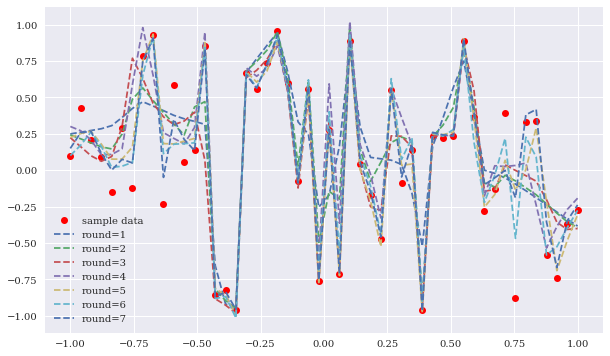

In [43]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x,
         y,
         'ro',
         label='sample data')
for _ in range(1, 8):
    model.fit(x,
              y,
              epochs=500,
              verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x,
             y_,
             '--',
             label=f'round={_}')
plt.legend();

## 分類問題

### 特徴量とラベルデータの作成

In [44]:
f = 5
n = 10

In [45]:
np.random.seed(100)

In [46]:
x = np.random.randint(0,
                      2,
                      (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [47]:
y = np.random.randint(0,
                      2,
                      n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### モデル定義

In [48]:
model = Sequential()
model.add(Dense(256,
                activation='relu',
                input_dim=f))
model.add(Dense(1,
                activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

### 学習

In [49]:
hist = model.fit(x,
                 y,
                 epochs=50,
                 verbose=False)

### 予測

In [50]:
y_ = np.where(model.predict(x).flatten() > 0.5,
              1,
              0)
y_

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

### 予測と正解の比較

In [51]:
y == y_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

### 損失函数と正解率の表示

In [52]:
res = pd.DataFrame(hist.history)

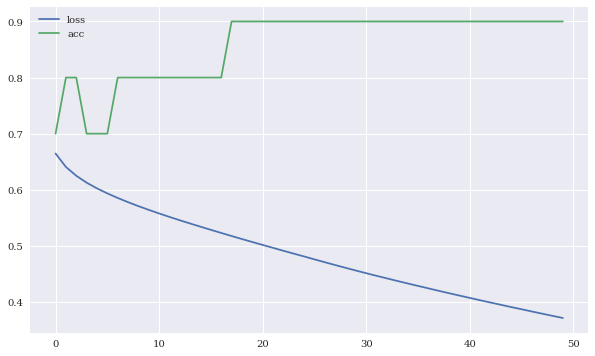

In [53]:
res.plot(figsize=(10, 6));

## 特徴量の重要性

### 特徴量とラベルデータの作成

In [54]:
f = 10
n = 250

In [55]:
np.random.seed(100)

In [56]:
x = np.random.randint(0,
                      2,
                      (n, f))
x[:4]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [57]:
y = np.random.randint(0,
                      2,
                      n)
y[:4]

array([0, 1, 0, 0])

### 特徴量のパターン数

In [58]:
2 ** f

1024

### DataFrameへのRawデータの格納

### 列名の作成

In [59]:
fcols = [f'f{_}' for _ in range(f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

### DataFrame作成

In [60]:
data = pd.DataFrame(x,
                    columns=fcols)
data['l'] = y

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f0      250 non-null    int64
 1   f1      250 non-null    int64
 2   f2      250 non-null    int64
 3   f3      250 non-null    int64
 4   f4      250 non-null    int64
 5   f5      250 non-null    int64
 6   f6      250 non-null    int64
 7   f7      250 non-null    int64
 8   f8      250 non-null    int64
 9   f9      250 non-null    int64
 10  l       250 non-null    int64
dtypes: int64(11)
memory usage: 21.6 KB


### データの集約

In [62]:
grouped = data.groupby(list(data.columns))

`pd.DataFrame.groupby()`：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [63]:
grouped

### ここ、何やってるかイメージがつかめない

In [64]:
freq = grouped['l'].size().unstack(fill_value=0)

`pd.DataFrame.size()`：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html
`pd.DataFrame.unstack()`：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

In [65]:
freq['sum'] = freq[0] + freq[1]

In [66]:
freq.head(10)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
                     1  1  1   0  1    1
                  1  0  0  0   0  1    1
                        1  0   0  1    1
            1  0  0  0  1  1   1  0    1
                  1  1  0  0   1  0    1

In [67]:
freq['sum'].describe().astype(int)

count    227
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        2
Name: sum, dtype: int64

### scikit-learnのMLPClassifierで予測する

### インポート(追加)

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### モデル定義

In [69]:
model = MLPClassifier(hidden_layer_sizes=[128, 128, 128],
                      max_iter=1000,
                      random_state=100)

### 学習

In [70]:
model.fit(data[fcols],
          data['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

### accuracy_score

In [71]:
accuracy_score(data['l'],
               model.predict(data[fcols]))

0.952

### train-test split

In [72]:
split = int(len(data) * 0.7)

In [73]:
train = data[:split]
test = data[split:]

### model fit traindata

In [74]:
model.fit(train[fcols],
          train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

### train accuracy

In [75]:
accuracy_score(train['l'],
               model.predict(train[fcols]))

0.9714285714285714

### test accuracy

In [76]:
accuracy_score(test['l'],
               model.predict(test[fcols]))

0.38666666666666666

## より大きなデータセット

### 大きなデータセットの整備

In [77]:
factor = 50

In [78]:
big = pd.DataFrame(np.random.randint(0,
                                     2,
                                     (factor * n, f)),
                   columns=fcols)

In [80]:
big['l'] = np.random.randint(0,
                             2,
                             factor * n)

### train-testデータ作成

In [81]:
train = big[:split]
test = big[split:]

### 学習

In [82]:
model.fit(train[fcols],
          train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

### trainデータの正答率

In [83]:
accuracy_score(train['l'],
               model.predict(train[fcols]))

0.9485714285714286

### testデータの正答率

In [84]:
accuracy_score(test['l'],
               model.predict(test[fcols]))

0.4945233265720081

### パターンの網羅性と平均頻度のチェック

ここはまだイメージがつかめない。

In [85]:
grouped = big.groupby(list(data.columns))

In [86]:
freq = grouped['l'].size().unstack(fill_value=0)

In [87]:
freq['sum'] = freq[0] + freq[1]

In [88]:
freq.head()

l                               0   1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9             
0  0  0  0  0  0  0  0  0  0    8  11   19
                           1    3   6    9
                        1  0    4   3    7
                           1    8   4   12
                     1  0  0   11   6   17

In [89]:
freq['sum'].describe().astype(int)

count    1024
mean       12
std         3
min         2
25%        10
50%        12
75%        15
max        26
Name: sum, dtype: int64

### 25 features * 8 values pattern

In [90]:
8 ** 25

37778931862957161709568